In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [4]:
raw_data=pd.read_csv('1.04.Real-life-example.csv')

# raw_data.head()

In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Preprocessing 

### Data Cleaning

In [6]:
data = raw_data.drop(['Model'], axis=1) #drop Model comumn
# data.describe(include='all')

In [7]:
data.isnull().sum() 

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_no_mv = data.dropna(axis=0)
#data_no_mv.describe(include='all')

In [9]:
q = data_no_mv['Price'].quantile(0.99) # value of 99th percentile
data_1 = data_no_mv[data_no_mv['Price']<q] # drop top 1 percentile

In [10]:
q2 = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q2]

In [11]:
data_3 = data_2[data_2['EngineV']<6.5]


In [12]:
q=data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

In [13]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking OLS Assumptions

##### Check Linearity

Text(0.5, 1.0, 'Price and Mileage')

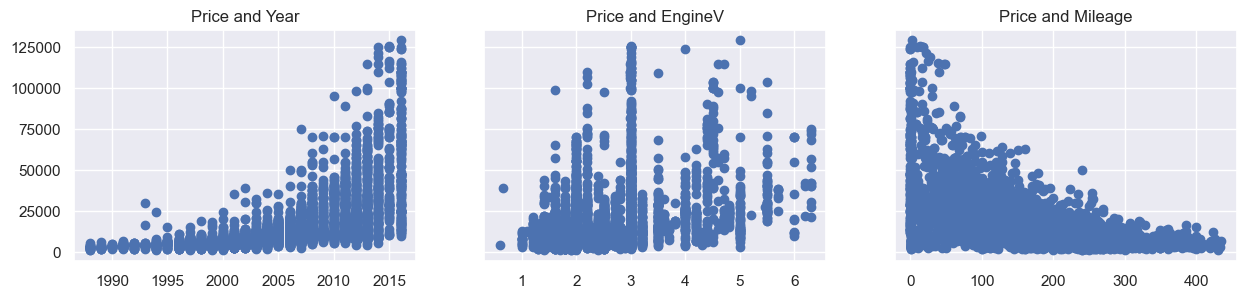

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

In [15]:
log_price = np.log(data_cleaned['Price']) # log Transformation to make relation linear
data_cleaned['log_price'] = log_price



Text(0.5, 1.0, 'Log Price and Mileage')

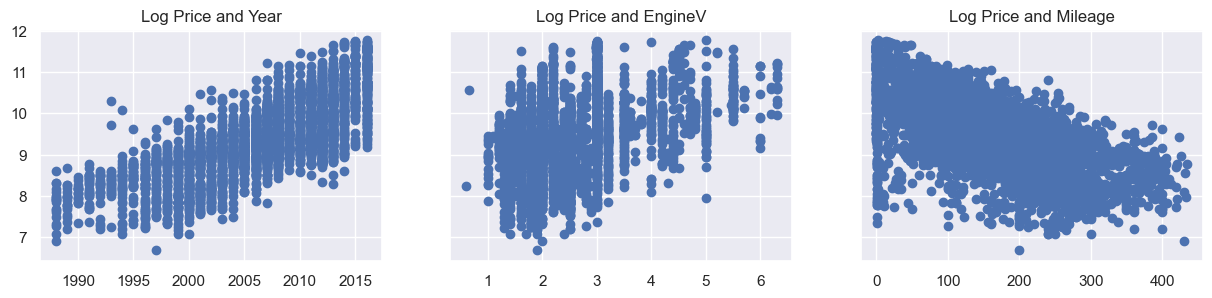

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

In [17]:
data_cleaned = data_cleaned.drop(['Price'],axis=1) # drop price column

##### Multicollinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [19]:
## VIF = 1 ==> NO multicollinearity greater means more ==> year>10 so drop year
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)



### Dummy Vriables 

In [20]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [21]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [22]:
data_preprocessed = data_with_dummies[cols]

## Regression

In [23]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [27]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets, test_size=0.2, random_state=42)

### Create Regression

In [31]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

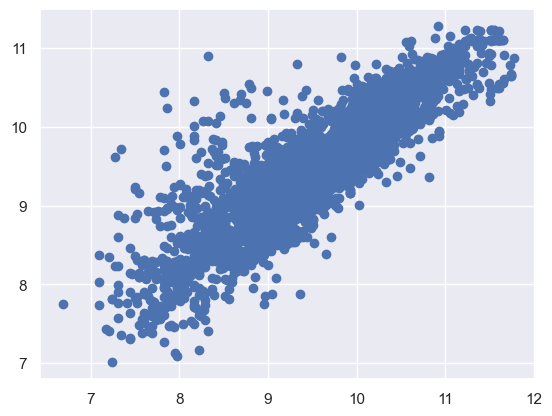

In [32]:
y_hat = reg.predict(x_train)

plt.scatter(y_train,y_hat)
plt.show()

<Axes: xlabel='log_price', ylabel='Count'>

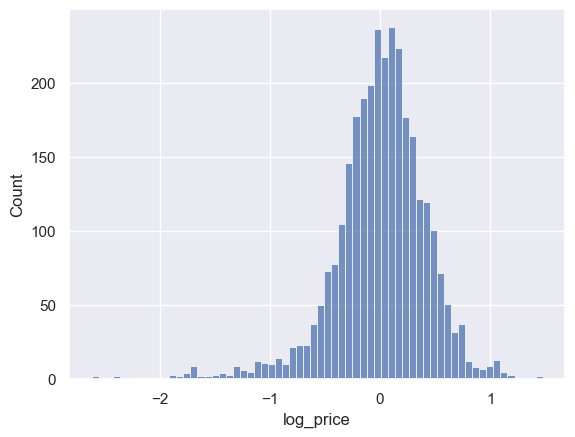

In [47]:
sns.histplot(y_train-y_hat)

In [34]:
reg.score(x_train,y_train)

0.7546487921881218

##### Weights And Bias

In [35]:
reg.coef_, reg.intercept_

(array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
        -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
        -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
        -0.15106183,  0.31442123]),
 9.421003614148074)

In [41]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


## Testing

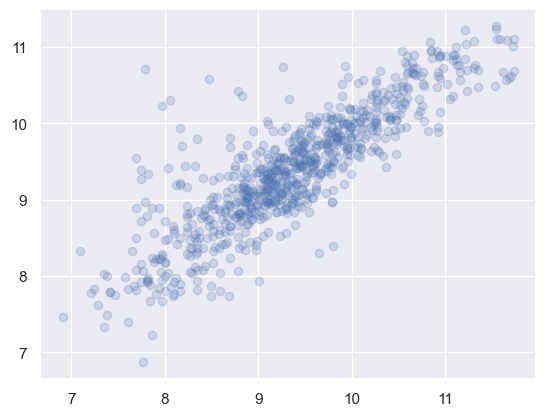

In [44]:
y_hat_test = reg.predict(x_test)

plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.show()

<Axes: xlabel='log_price', ylabel='Count'>

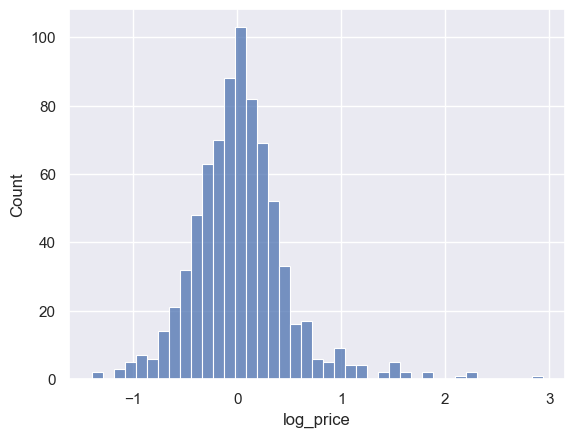

In [48]:
sns.histplot(y_hat_test-y_test)

###### Test is very scattered